In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
countries_df = pd.read_csv('data/Country-data.csv')
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**There is no null data and also no data type change is required.**

In [3]:
# Check the NAN values
100 * np.isnan(countries_df.loc[:,countries_df.columns != 'country']).sum() / countries_df.shape[1]

child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

**No NAN value in the numerical columns.**

In [4]:
countries_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# get lost of numerical values
num_cols = countries_df.columns.drop('country')
num_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

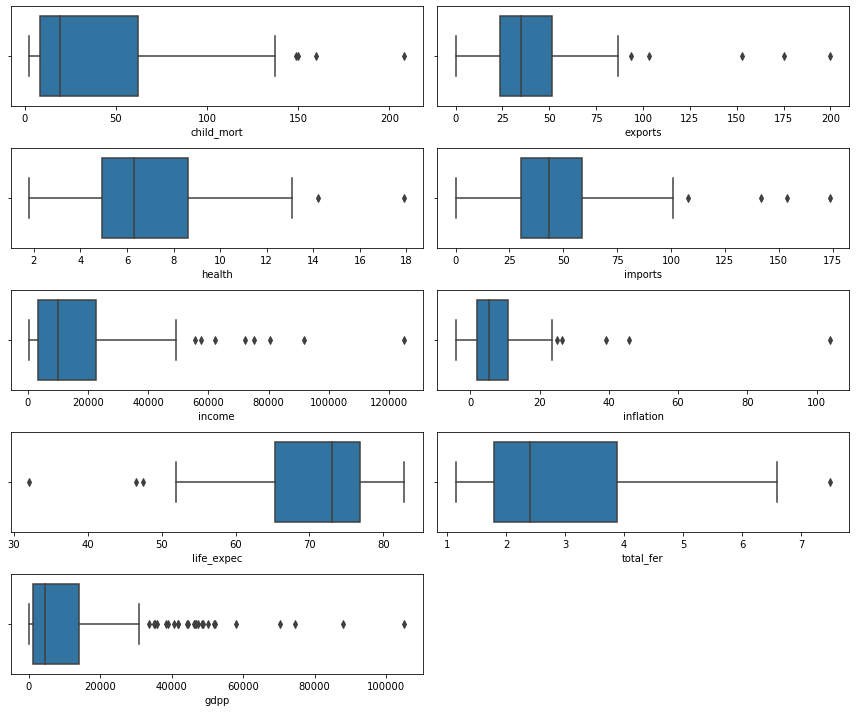

In [6]:
# Plot boxplot of each numerical column
plt.figure(figsize=(12,10))
i = 1
for x in num_cols:
    plt.subplot(5,2,i)
    sns.boxplot(countries_df[x])
    i = i+1
plt.tight_layout() 
plt.show()

### Outerlier Treatment

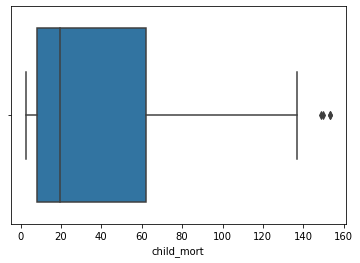

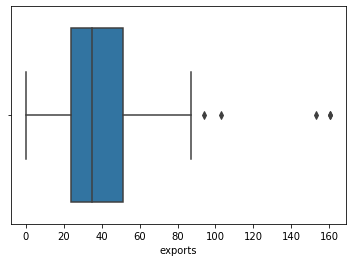

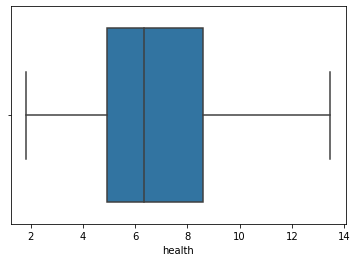

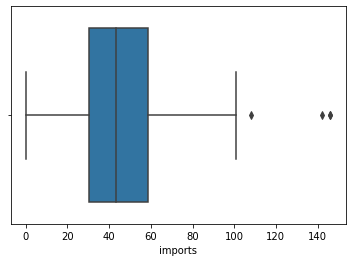

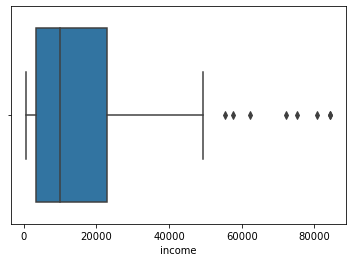

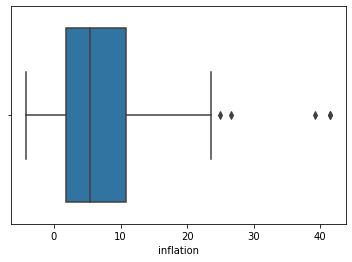

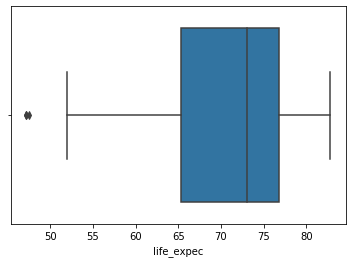

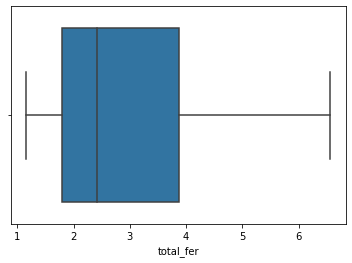

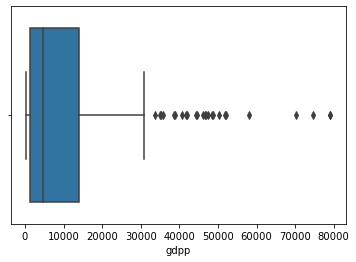

In [7]:
# method to cap the ouliers
def outliter_treat(col, low_val, hig_val):
    if low_val is not None:
        Q1 = countries_df[col].quantile(low_val)
        countries_df[col][countries_df[col] <= Q1] = Q1
    if hig_val is not None:
        Q4 = countries_df[col].quantile(hig_val)
        countries_df[col][countries_df[col] >= Q4] = Q4
    sns.boxplot(countries_df[col])
    plt.show()

outliter_treat('child_mort', None, 0.99)
outliter_treat('exports', None, 0.99)
outliter_treat('health', None, 0.99)
outliter_treat('imports', None, 0.99)
outliter_treat('income', None, 0.99)
outliter_treat('inflation', None, 0.99)
outliter_treat('life_expec', 0.01, None)
outliter_treat('total_fer', None, 0.99)
outliter_treat('gdpp', None, 0.99)

In [8]:
country_col = countries_df.pop('country')

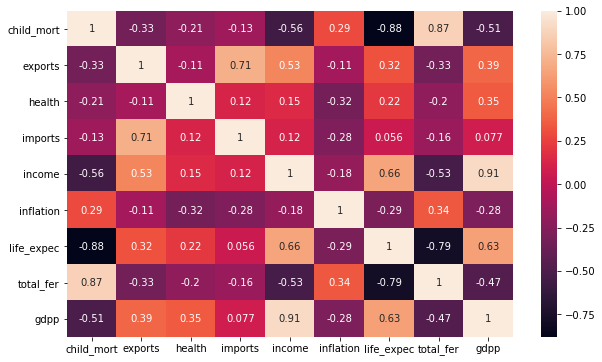

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(countries_df.corr(), annot=True)
plt.show()

## Scaling

In [10]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(countries_df)

## PCA

In [11]:
pca = PCA(random_state=42)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.components_

array([[-0.41700032,  0.27212924,  0.15852946,  0.15118149,  0.40168732,
        -0.21159298,  0.42655346, -0.40418205,  0.39068362],
       [ 0.16155105,  0.61551215, -0.20989043,  0.69387966, -0.00279266,
        -0.0317796 , -0.20625253,  0.13247007, -0.0917437 ],
       [-0.07779963,  0.18980385, -0.65370952, -0.26898013,  0.25326527,
         0.61219723,  0.12088327, -0.03121671,  0.06098583],
       [ 0.38099343,  0.06146486,  0.3312943 , -0.09839304,  0.43835264,
         0.16328136, -0.19258762,  0.41839054,  0.54833794],
       [-0.1769183 ,  0.04967569,  0.56374517,  0.2212085 , -0.16964271,
         0.72743461,  0.07300327, -0.10559191, -0.15833992],
       [ 0.14604049, -0.02178691,  0.02570502, -0.06294787,  0.17120069,
         0.04662684, -0.66480786, -0.70659553,  0.02904899],
       [-0.08856581, -0.69817574, -0.25068334,  0.59271548,  0.12798828,
         0.12639961, -0.02351872,  0.01263559,  0.23975467],
       [ 0.75806786, -0.03957558, -0.02119637,  0.0821392 , -0

In [13]:
pca.explained_variance_ratio_

array([0.47280208, 0.16877577, 0.13442639, 0.10593418, 0.06852792,
       0.02044179, 0.01360088, 0.0096277 , 0.00586329])

In [14]:
var_cumulative = np.cumsum(pca.explained_variance_ratio_)
var_cumulative

array([0.47280208, 0.64157785, 0.77600424, 0.88193842, 0.95046634,
       0.97090813, 0.98450901, 0.99413671, 1.        ])

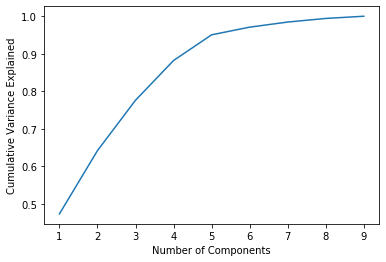

In [15]:
var_cumulative = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot(y=var_cumulative, x=range(1,len(var_cumulative)+1))
plt.ylabel("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.show()

Here we can see, with only 5 components we can get 95% of information

In [16]:
pca = IncrementalPCA(n_components=5)
new_data = pca.fit_transform(scaled_df)
new_data.shape

(167, 5)

In [17]:
df = pd.DataFrame(new_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.023788,0.024457,0.871170,0.961091,-0.024201
1,0.451669,-0.511375,0.265117,-1.270917,0.048428
2,-0.374853,-0.487914,-1.515627,-0.693159,0.328031
3,-3.162289,1.582756,-1.792641,1.265943,0.084141
4,1.107152,0.230779,0.199150,-0.859570,-0.372663


## Clustering

In [18]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
hopkins(df)

0.7709559048898729

Bases on Hopkins score sata is good for clustering

## K-Means Clustering

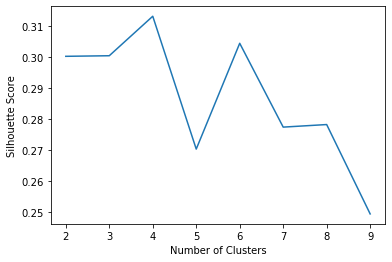

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

ss=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    ss.append(silhouette_score(df, kmeans.labels_))
sns.lineplot(x=range(2,10), y=ss)
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.show()

### Elbow Curve

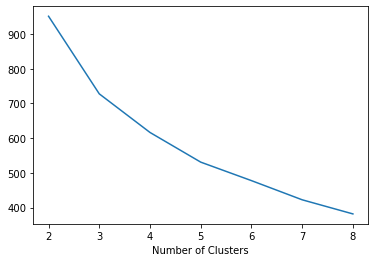

In [21]:
# Plot Elbow Curve graph
ssd = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=50)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)

sns.lineplot(x=range(2,9), y=ssd)
plt.xlabel('Number of Clusters')
plt.show()

**Silhoutte analysis suggests 4 clusters but Elbow curve suggests 3 clusters. Even in Silhoutte analysis 3 has a good score so lets go with 3 clusters**

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [23]:
# Merge CLusters with original data frame
cluster_df = pd.DataFrame(pd.Series(kmeans.labels_), columns=['cluster'])
original_df = pd.concat([countries_df, cluster_df], axis=1)
original_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2


In [24]:
pc_df = pd.concat([df, cluster_df], axis=1)
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster
0,-3.023788,0.024457,0.871170,0.961091,-0.024201,1
1,0.451669,-0.511375,0.265117,-1.270917,0.048428,2
2,-0.374853,-0.487914,-1.515627,-0.693159,0.328031,2
3,-3.162289,1.582756,-1.792641,1.265943,0.084141,1
4,1.107152,0.230779,0.199150,-0.859570,-0.372663,2


In [25]:
# Get number of countries in each cluster
pc_df.cluster.value_counts()

2    83
1    47
0    37
Name: cluster, dtype: int64

#### Plots based on clusters:

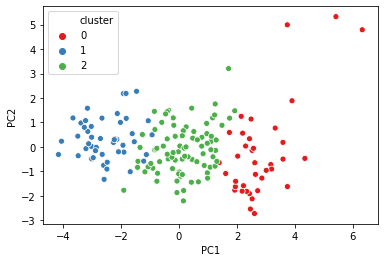

In [26]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pc_df, legend='full', palette='Set1')
plt.show()

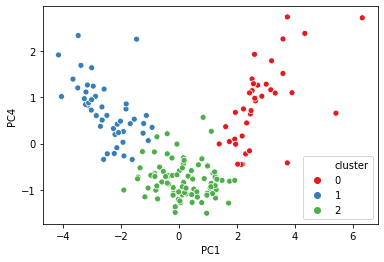

In [27]:
sns.scatterplot(x='PC1', y='PC4', hue='cluster', data=pc_df, legend='full', palette='Set1')
plt.show()

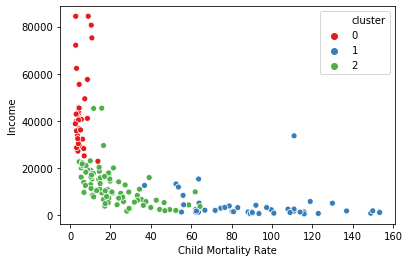

In [60]:
sns.scatterplot(x='child_mort', y='income', hue='cluster', data=original_df, legend='full', palette='Set1')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Income')
plt.show()

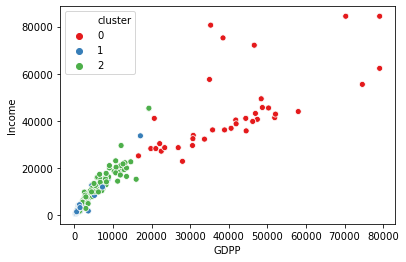

In [59]:
sns.scatterplot(x='gdpp', y='income', hue='cluster', data=original_df, legend='full', palette='Set1')
plt.ylabel('Income')
plt.xlabel('GDPP')
plt.show()

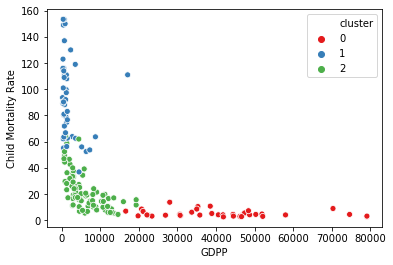

In [54]:
sns.scatterplot(x='gdpp', y='child_mort', data=original_df, legend='full', palette='Set1', hue='cluster')
plt.ylabel('Child Mortality Rate')
plt.xlabel('GDPP')
plt.show()

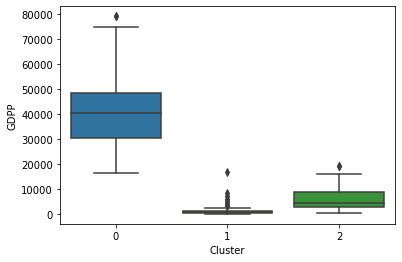

In [55]:
sns.boxplot(x='cluster', y='gdpp', data=original_df)
plt.ylabel('GDPP')
plt.xlabel('Cluster')
plt.show()

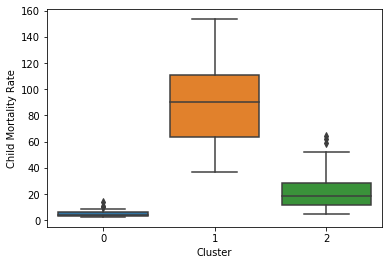

In [56]:
sns.boxplot(x='cluster', y='child_mort', data=original_df)
plt.ylabel('Child Mortality Rate')
plt.xlabel('Cluster')
plt.show()

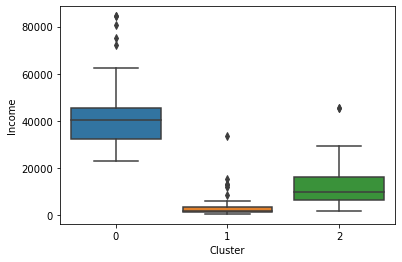

In [57]:
sns.boxplot(x='cluster', y='income', data=original_df)
plt.ylabel('Income')
plt.xlabel('Cluster')
plt.show()

**By all these graphs we can see countries in cluster 1 need the more help**

In [58]:
# List of countries in cluster 1
original_df['country']=country_col
original_df.loc[original_df.cluster==1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,country,hier_cluster
0,90.2,10.00,7.58,44.9,1610.0,9.440,56.20,5.8200,553.0,1,Afghanistan,0
3,119.0,62.30,2.85,42.9,5900.0,22.400,60.10,6.1600,3530.0,1,Angola,0
17,111.0,23.80,4.10,37.2,1820.0,0.885,61.80,5.3600,758.0,1,Benin,0
21,52.5,43.60,8.30,51.3,13300.0,8.920,57.10,2.8800,6350.0,1,Botswana,0
25,116.0,19.20,6.74,29.6,1430.0,6.810,57.90,5.8700,575.0,1,Burkina Faso,0
26,93.6,8.92,11.60,39.2,764.0,12.300,57.70,6.2600,231.0,1,Burundi,0
28,108.0,22.20,5.13,27.0,2660.0,1.910,57.30,5.1100,1310.0,1,Cameroon,0
31,149.0,11.80,3.98,26.5,888.0,2.010,47.50,5.2100,446.0,1,Central African Republic,0
32,150.0,36.80,4.53,43.5,1930.0,6.390,56.50,6.5636,897.0,1,Chad,0
36,88.2,16.50,4.51,51.7,1410.0,3.870,65.90,4.7500,769.0,1,Comoros,0


## Hierarchichal Clustering

### Single Linkage

In [35]:
# Import required modules for hierarchical clustering
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram

In [36]:
df.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.023788,0.024457,0.871170,0.961091,-0.024201
1,0.451669,-0.511375,0.265117,-1.270917,0.048428
2,-0.374853,-0.487914,-1.515627,-0.693159,0.328031
3,-3.162289,1.582756,-1.792641,1.265943,0.084141
4,1.107152,0.230779,0.199150,-0.859570,-0.372663


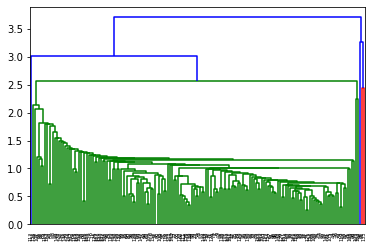

In [37]:
# Perform Single linkage and plot dendrogram
mergings = linkage(df, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

### Complete Linkage

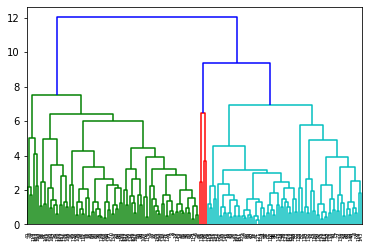

In [38]:
# Perform Single linkage and plot dendrogram
mergings = linkage(df, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

**With 3 clusters the graph cuts the data in optimal clusters so let's go with 3 clusters**

In [39]:
# Cut the mergings at 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [40]:
# Merge the cluster with original data frames
original_df['hier_cluster'] = cluster_labels
pc_df['hier_cluster'] = cluster_labels

In [41]:
# Count of countries in each clusters
original_df['cluster'].value_counts()

2    83
1    47
0    37
Name: cluster, dtype: int64

#### Visual the cluster on various axis:

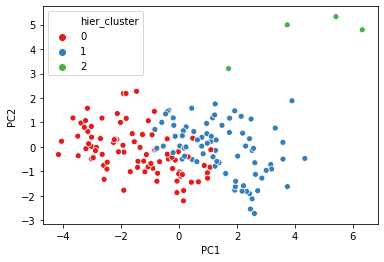

In [42]:
sns.scatterplot(x='PC1', y='PC2', data=pc_df, hue='hier_cluster', legend='full', palette='Set1')
plt.show()

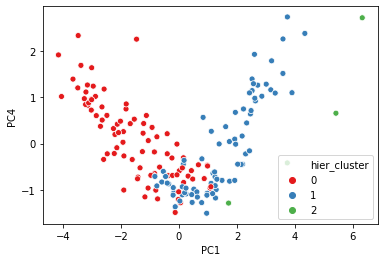

In [43]:
sns.scatterplot(x='PC1', y='PC4', data=pc_df, hue='hier_cluster', legend='full', palette='Set1')
plt.show()

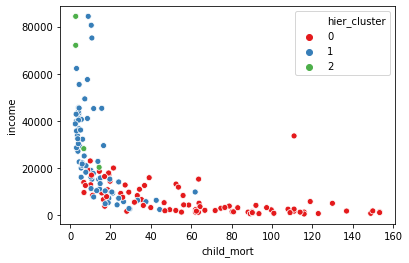

In [44]:
sns.scatterplot(x='child_mort', y='income', hue='hier_cluster', data=original_df, legend='full', palette='Set1')
plt.show()

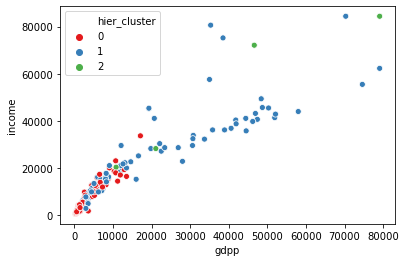

In [45]:
sns.scatterplot(x='gdpp', y='income', hue='hier_cluster', data=original_df, legend='full', palette='Set1')
plt.show()

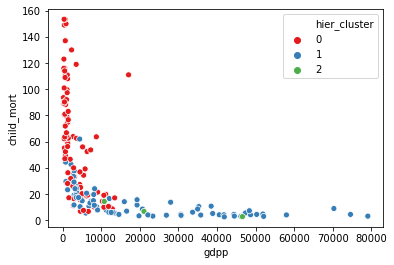

In [46]:
sns.scatterplot(x='gdpp', y='child_mort', data=original_df, legend='full', palette='Set1', hue='hier_cluster')
plt.show()

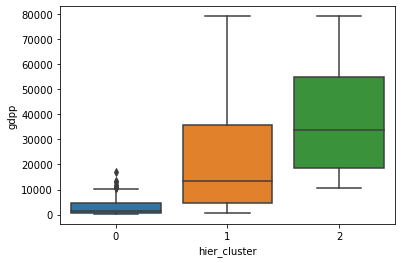

In [47]:
sns.boxplot(x='hier_cluster', y='gdpp', data=original_df)
plt.show()

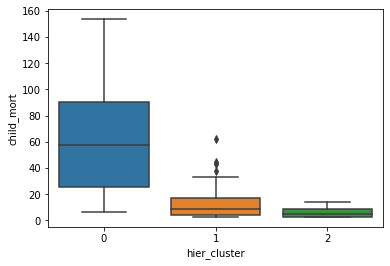

In [48]:
sns.boxplot(x='hier_cluster', y='child_mort', data=original_df)
plt.show()

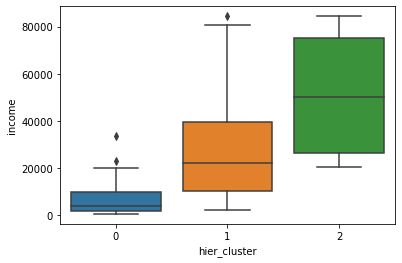

In [49]:
sns.boxplot(x='hier_cluster', y='income', data=original_df)
plt.show()

In [50]:
original_df.loc[original_df.cluster==1,['country', 'gdpp']].sort_values(by='gdpp').head(10)

,country,gdpp
26,Burundi,231.0
88,Liberia,327.0
37,"Congo, Dem. Rep.",334.0
112,Niger,348.0
132,Sierra Leone,399.0
93,Madagascar,413.0
106,Mozambique,419.0
31,Central African Republic,446.0
94,Malawi,459.0
50,Eritrea,482.0


In [51]:
original_df.loc[original_df.cluster==1,['country', 'income']].sort_values(by='income').head(10)

,country,income
37,"Congo, Dem. Rep.",609.0
88,Liberia,700.0
26,Burundi,764.0
112,Niger,814.0
31,Central African Republic,888.0
106,Mozambique,918.0
94,Malawi,1030.0
63,Guinea,1190.0
150,Togo,1210.0
132,Sierra Leone,1220.0


In [52]:
original_df.loc[original_df.cluster==1,['country', 'child_mort']].sort_values(by='child_mort', ascending=False).head(10)

,country,child_mort
132,Sierra Leone,153.4
66,Haiti,153.4
32,Chad,150.0
31,Central African Republic,149.0
97,Mali,137.0
113,Nigeria,130.0
112,Niger,123.0
3,Angola,119.0
25,Burkina Faso,116.0
37,"Congo, Dem. Rep.",116.0


**Looking at the data , 5 countries which need the help most are:**
<ol>
    <li>
        Burundi
    </li>
    <li>
        Liberia
    </li>
    <li>
        Congo, Dem. Rep.
    </li>
    <li>
        Sierra Leone
    </li>
    <li>
        Niger
    </li>
</ol>
